In [9]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [3]:
with open(f"/app/runs/ctc_with_masking/fold3_weightdecay_noerase_concat/logs.txt") as f:
    newrun = []
    current_epo = 0
    for line in f.readlines():
        pattern = r"Epoch: (\d+), Norm distance: ([0-9.+-e]+),"
        # Use regex to find matches
        matches = re.search(pattern, line)

        if matches:
            # The first group corresponds to the epoch number
            epoch_number = int(matches.group(1))
            # The second group corresponds to the norm distance
            norm_distance = float(matches.group(2))
            if epoch_number==0:
                newrun = [(epoch_number,norm_distance)]
                current_epo = 0
            if current_epo==epoch_number:
                continue
            else:
                newrun.append((epoch_number,norm_distance))
                current_epo=epoch_number

In [7]:
df = pd.read_csv("/app/runs/ctc_with_masking/fold3_weightdecay_noerase_concat/logs.csv")

In [18]:
px.line(df.iloc[-25:],x="epoch",y=["loss","val_loss"])

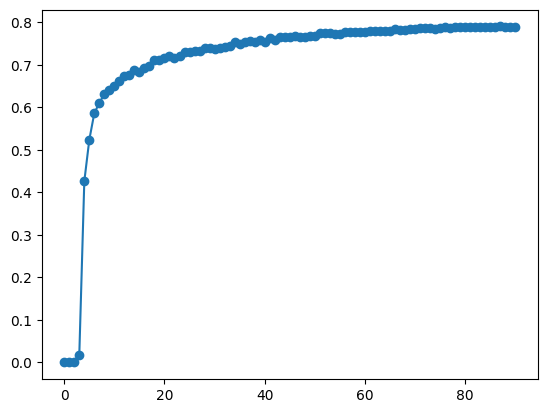

In [5]:
epochs = [item[0] for item in newrun]
metrics = [item[1] for item in newrun]

# plot the data
plt.plot(epochs, metrics, marker='o')
plt.show()